In [1]:
import numpy as np
import pandas as pd

In [2]:
url = ("http://hbiostat.org/data/repo/titanic3.xls")

df = pd.read_excel(url)
orig_df = df

### Inspect and Clean Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.describe().iloc[:,:2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Create Features

In [6]:
name = df.name

In [7]:
name.head(3)

0     Allen, Miss. Elisabeth Walton
1    Allison, Master. Hudson Trevor
2      Allison, Miss. Helen Loraine
Name: name, dtype: object

In [8]:
df = df.drop(columns=["name",
                      "ticket",
                      "home.dest",
                      "boat",
                      "body",
                      "cabin"])


In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df['sex_male'] = df['sex_male'].astype('int64')
df['embarked_Q'] = df['embarked_Q'].astype('int64')
df['embarked_S'] = df['embarked_S'].astype('int64')

In [11]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

### Split Data

In [12]:
y = df.survived
X = df.drop(["survived"], axis = 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.isnull().sum()

pclass          0
age           187
sibsp           0
parch           0
fare            1
sex_male        0
embarked_Q      0
embarked_S      0
dtype: int64

### Impute Data

In [16]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer


In [17]:
# Fix null values in X dataframe for Chapter 8
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age", "fare"]
X[cols_to_impute] = imp_mode.fit_transform(X[cols_to_impute])

In [18]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age", "fare"]
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

In [19]:
X_train.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [20]:
X_test.isnull().sum()

pclass         0
age           76
sibsp          0
parch          0
fare           0
sex_male       0
embarked_Q     0
embarked_S     0
dtype: int64

In [21]:
imp_mode = SimpleImputer(missing_values = np.nan, strategy="median")
cols_to_impute = ["age"]
X_test[cols_to_impute] = imp_mode.fit_transform(X_test[cols_to_impute])

In [22]:
X_test.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

### Normalize Data

In [23]:
# To be used for data scaling (normalizing)
from sklearn.preprocessing import StandardScaler

In [24]:
# easier way of building out a list when you have a lot of values/columns to add 
cols = "pclass,age,sibsp,parch,fare".split(",")
#cols = X_train.columns
cols

['pclass', 'age', 'sibsp', 'parch', 'fare']

In [25]:
sca = StandardScaler()
sca.fit(X_train[cols])
X_train[cols] = sca.transform(X_train[cols])

sca.fit(X_test[cols])
X_test[cols] = sca.transform(X_test[cols])

In [26]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
1214,0.825248,-0.070918,-0.498616,-0.432553,-0.474092,1,0,1
677,0.825248,-0.232596,-0.498616,-0.432553,-0.488616,1,0,1
534,-0.363317,-0.798468,-0.498616,-0.432553,-0.145647,0,0,1
1174,0.825248,-0.070918,6.897852,1.805972,0.679370,0,0,1
864,0.825248,-0.070918,-0.498616,-0.432553,-0.490904,0,0,1


### Chapter 10 begins here

In [27]:
pd.set_option('display.float_format', '{:.10f}'.format)

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [29]:
# get the accuracy score
lr.score(X_test, y_test)

0.7989821882951654

In [30]:
# predict the first record
lr.predict(X.iloc[[0]])

array([1], dtype=int64)

In [31]:
#predict probability
lr.predict_proba(X.iloc[[0]])

array([[7.30463638e-07, 9.99999270e-01]])

In [32]:
#predict log probability
lr.predict_log_proba(X.iloc[[0]])

array([[-1.41295864e+01, -7.30463905e-07]])

In [33]:
# Predict confidence scores for samples.
lr.decision_function(X.iloc[[0]])

array([14.12958565])

In [34]:
#  the intercept is the log odds of the baseline condition
# y-intercept
lr.intercept_

array([1.26368144])

In [35]:
# To convert the log odds back into a percent accuracy
def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))

inv_logit(lr.intercept_)

array([0.7796592])

In [36]:
cols = X.columns
for col, val in sorted(zip(cols, lr.coef_[0]),
                        key=lambda x: x[1],
                        reverse = True):
    print(f"{col:10}{val:10.3f}{inv_logit(val):10.3f}")

fare           0.106     0.527
parch         -0.055     0.486
sibsp         -0.246     0.439
age           -0.288     0.429
embarked_Q    -0.535     0.369
embarked_S    -0.561     0.363
pclass        -0.713     0.329
sex_male      -2.437     0.080


C:\Users\timry\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\timry\anaconda3\Lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


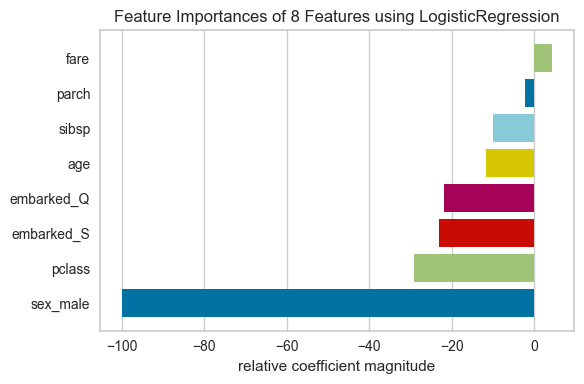

<Axes: title={'center': 'Feature Importances of 8 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [37]:
from yellowbrick.model_selection.importances import FeatureImportances
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(lr)
fi_viz.fit(X,y)
fi_viz.poof()

### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [39]:
# retrieve the accuracy score
nb.score(X_test, y_test)

0.7455470737913485

In [40]:
# predict the first record
nb.predict(X.iloc[[0]])

array([1], dtype=int64)

In [41]:
#predict probability
nb.predict_proba(X.iloc[[0]])

array([[0., 1.]])

In [42]:
# predict the log probability
nb.predict_log_proba(X.iloc[[0]])

array([[-46430.38070813,      0.        ]])

### Support Vector Machine (SVM)

In [43]:
from sklearn.svm import SVC

svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [44]:
# retrieve the accuracy score
svc.score(X_test, y_test)

0.7964376590330788

In [45]:
# predict the first record
svc.predict(X.iloc[[0]])

array([0], dtype=int64)

In [46]:
# predict the probability of the first record
svc.predict_proba(X.iloc[[0]])

array([[0.51274811, 0.48725189]])

In [47]:
# predict the log probability of the first record
svc.predict_log_proba(X.iloc[[0]])

array([[-0.66797058, -0.71897405]])

### K-Nearest Neighbor (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
# retrieve the accuracy score
knc.score(X_test, y_test)

0.7506361323155216

In [50]:
# predict the first record
knc.predict(X.iloc[[0]])

array([1], dtype=int64)

In [51]:
# predict the probability of the first record
knc.predict_proba(X.iloc[[0]])

array([[0.2, 0.8]])

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [53]:
# retrieve the accuracy score
dt.score(X_test, y_test)

0.811704834605598

In [54]:
# predict the first record
dt.predict(X.iloc[[0]])

array([0], dtype=int64)

In [55]:
# predict the probability of the first record
dt.predict_proba(X.iloc[[0]])

array([[0.89655172, 0.10344828]])

In [56]:
# predict the log probability of the first record
dt.predict_log_proba(X.iloc[[0]])

array([[-0.10919929, -2.26868354]])

In [57]:
#pip install pydotplus 

In [58]:
#pip install graphviz

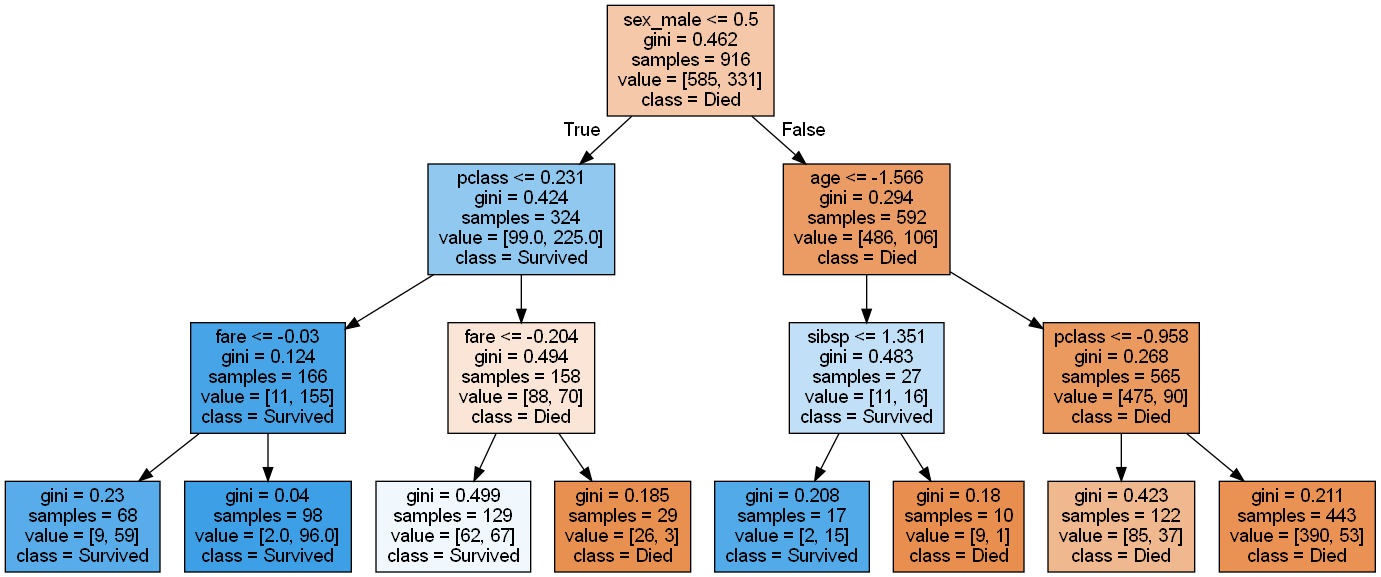

In [59]:
#### DOES NOT WORK ####
#### graphviz does not want to install #####

# to view the tree
import pydotplus
import graphviz
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = StringIO()
export_graphviz(
    dt,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["Died","Survived"],
    filled=True)

g = pydotplus.graph_from_dot_data(dot_data.getvalue())
g.write_png("mlpr_1002.png")

Image(g.create_png())

In [60]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [61]:
#pip install dtreeviz

C:\Users\timry\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


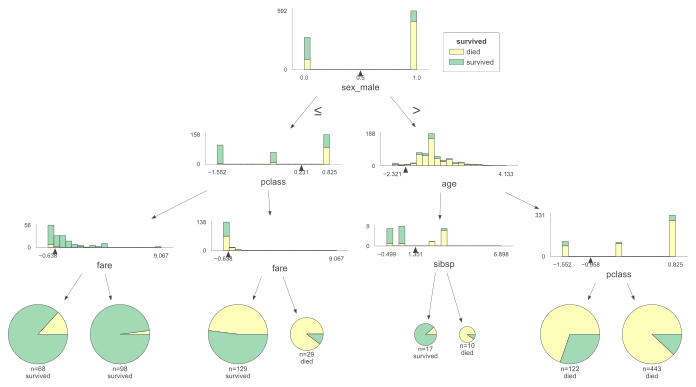

In [62]:
### Does not work either ####
from dtreeviz.trees import model

viz = model(
    model=dt,
    X_train=X_train,
    y_train=y_train,
    target_name="survived",
    feature_names=X.columns,
    class_names=["died","survived"])
viz.view()

In [63]:
#feature importances
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda x:x[1],
    reverse=True)[:5]:print(f"{col:10}{val:10.3f}")


sex_male       0.607
pclass         0.248
age            0.053
fare           0.050
sibsp          0.042


C:\Users\timry\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


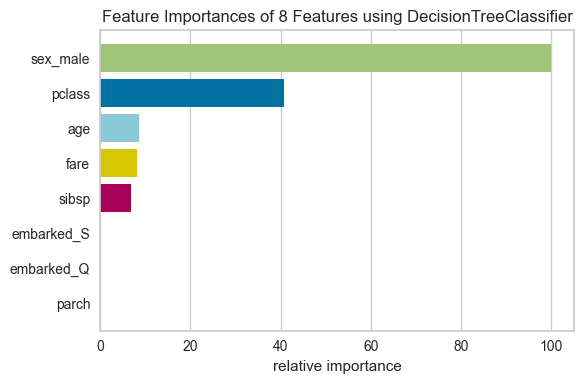

<Axes: title={'center': 'Feature Importances of 8 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [64]:
from yellowbrick.model_selection.importances import FeatureImportances

fig,ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(dt)
fi_viz.fit(X,y)
fi_viz.poof()

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [66]:
# get the accuracy score
rf.score(X_test, y_test)

0.8015267175572519

In [67]:
# predict the first record
rf.predict(X.iloc[[0]])

array([0], dtype=int64)

In [68]:
# predict the probability of the first record
rf.predict_proba(X.iloc[[0]])

array([[0.5, 0.5]])

In [69]:
# predict the log probability of the first record
rf.predict_log_proba(X.iloc[[0]])

array([[-0.69314718, -0.69314718]])

In [70]:
for col, val in sorted(
    zip(X.columns, rf.feature_importances_),
    key=lambda x:x[1],
    reverse=True)[:5]:
    print(f"{col:10}{val:10.3f}")

fare           0.285
age            0.260
sex_male       0.237
pclass         0.089
sibsp          0.049


In [71]:
import rfpimp
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rfpimp.importances(rf, X_test, y_test).Importance

Feature
sex_male     0.1857506361
pclass       0.0661577608
age          0.0661577608
embarked_S   0.0279898219
fare         0.0254452926
parch        0.0101781170
sibsp        0.0076335878
embarked_Q   0.0050890585
Name: Importance, dtype: float64

### XGBoost

In [72]:
import xgboost as xgb

# This was added due to an AttributeError appearing

try:
    xgb_class = xgb.XGBClassifier(random_state=42, early_stopping_rounds=10)
    xgb_class.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)])
except AttributeError:
    pass

[0]	validation_0-logloss:0.57203
[1]	validation_0-logloss:0.51184
[2]	validation_0-logloss:0.48721
[3]	validation_0-logloss:0.46836
[4]	validation_0-logloss:0.45394
[5]	validation_0-logloss:0.44885
[6]	validation_0-logloss:0.44877
[7]	validation_0-logloss:0.45021
[8]	validation_0-logloss:0.44972
[9]	validation_0-logloss:0.45394
[10]	validation_0-logloss:0.45379
[11]	validation_0-logloss:0.45469
[12]	validation_0-logloss:0.45707
[13]	validation_0-logloss:0.45468
[14]	validation_0-logloss:0.45315
[15]	validation_0-logloss:0.45532
[16]	validation_0-logloss:0.45697


In [73]:
# get the accuracy score
xgb_class.score(X_test, y_test)

0.806615776081425

In [74]:
# predict the first record
xgb_class.predict(X.iloc[[0]])

array([0])

In [75]:
# predict the probability of the first record
xgb_class.predict_proba(X.iloc[[0]])

array([[0.8402729 , 0.15972707]], dtype=float32)

In [76]:
# print feature importances
for col, val in sorted(
    zip(X.columns, xgb_class.feature_importances_),
    key = lambda x:x[1],
    reverse=True)[:5]:
    print(f"{col:10}{val:10.3f}")

sex_male       0.673
pclass         0.168
sibsp          0.045
embarked_Q     0.029
fare           0.027


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

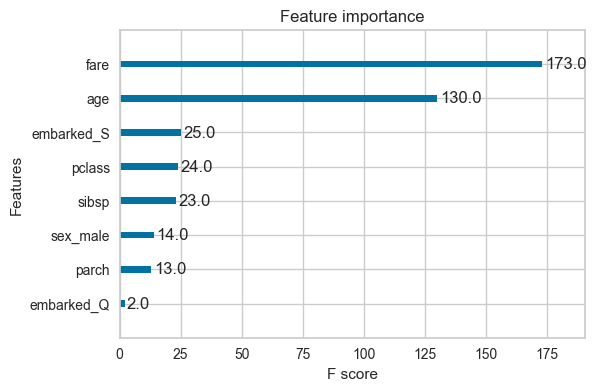

In [77]:
fig, ax = plt.subplots(figsize=(6,4))
xgb.plot_importance(xgb_class, ax=ax)

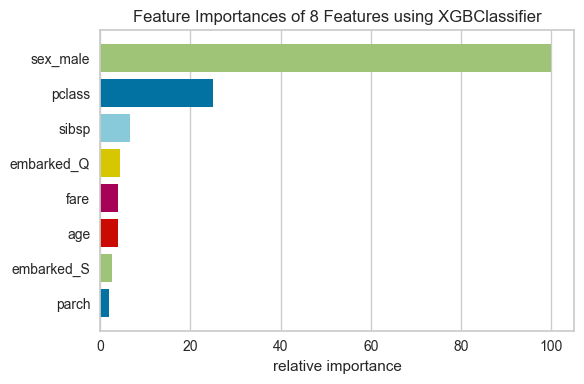

<Axes: title={'center': 'Feature Importances of 8 Features using XGBClassifier'}, xlabel='relative importance'>

In [78]:
fig, ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(xgb_class)
fi_viz.fit(X,y)
fi_viz.poof()

In [79]:
booster = xgb_class.get_booster()
print(booster.get_dump()[0])

0:[sex_male<1] yes=1,no=2,missing=2
	1:[pclass<0.825247765] yes=3,no=4,missing=4
		3:leaf=0.717911363
		4:[fare<-0.202479795] yes=7,no=8,missing=8
			7:[fare<-0.500219285] yes=13,no=14,missing=14
				13:leaf=0.534197509
				14:[fare<-0.353402138] yes=21,no=22,missing=22
					21:[fare<-0.36539945] yes=29,no=30,missing=30
						29:leaf=0.110021837
						30:leaf=-0.239479303
					22:[fare<-0.240368083] yes=31,no=32,missing=32
						31:leaf=0.392039597
						32:leaf=0.101809353
			8:leaf=-0.294533104
	2:[age<-1.52601898] yes=5,no=6,missing=6
		5:[sibsp<1.35050142] yes=9,no=10,missing=10
			9:[age<-2.26030326] yes=15,no=16,missing=16
				15:leaf=0.163437903
				16:leaf=0.604846299
			10:leaf=-0.239479303
		6:[pclass<-0.363316625] yes=11,no=12,missing=12
			11:[embarked_S<1] yes=17,no=18,missing=18
				17:[fare<0.825950623] yes=23,no=24,missing=24
					23:[sibsp<0.425942898] yes=33,no=34,missing=34
						33:leaf=0.0479366928
						34:leaf=0.27990222
					24:[age<-0.232595831] yes=35,no=36,mi

<Axes: >

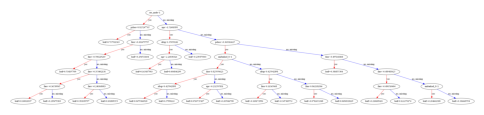

In [80]:
#### DOES NOT WORK - GRAPHVIZ ISSUE ####
fig, ax = plt.subplots(figsize=(6,4))
xgb.plot_tree(xgb_class, ax=ax, num_trees=0)

In [81]:
#pip install --upgrade openpyxl

In [82]:
#pip install xgbfir

In [83]:
import xgbfir
xgbfir.saveXgbFI(
    xgb_class,
    feature_names=X.columns,
    OutputXlsxFile="fir.xlsx")
pd.read_excel("fir.xlsx").head(3).T

,0,1,2
Interaction,sex_male,fare,pclass
Gain,519.9251760760,258.6530357107,222.1094925510
FScore,14,173,24
wFScore,13.0203858455,39.4650903936,8.6366235286
Average wFScore,0.9300275604,0.2281219098,0.3598593137
Average Gain,37.1375125769,1.4951042527,9.2545621896
Expected Gain,519.5555425245,63.0554678991,87.8836768861
Gain Rank,1,2,3
FScore Rank,6,1,4
wFScore Rank,3,1,4


In [84]:
pd.read_excel("fir.xlsx",
              sheet_name="Interaction Depth 1").head(2).T

,0,1
Interaction,pclass|sex_male,age|sex_male
Gain,700.0333646880,543.2816241210
FScore,12,10
wFScore,4.5582117332,5.9733151659
Average wFScore,0.3798509778,0.5973315166
Average Gain,58.3361137240,54.3281624121
Expected Gain,260.4456558052,341.2061020416
Gain Rank,1,2
FScore Rank,10,12
wFScore Rank,7,4


In [85]:
pd.read_excel("fir.xlsx",
              sheet_name="Interaction Depth 2").head(1).T

,0
Interaction,fare|pclass|sex_male
Gain,954.9730028150
FScore,18
wFScore,3.3163453707
Average wFScore,0.1842414095
Average Gain,53.0540557119
Expected Gain,175.8224474764
Gain Rank,1
FScore Rank,8
wFScore Rank,5


In [86]:
pd.read_excel("fir.xlsx",
              sheet_name="Interaction Depth 2")[["Interaction","Gain"]].head()

,Interaction,Gain
0,fare|pclass|sex_male,954.9730028150
1,age|sex_male|sibsp,582.0196517700
2,age|pclass|sex_male,530.5445976430
3,fare|fare|pclass,383.5414755482
4,fare|fare|fare,256.4413615518


### Gradient Boosted with LightGBM

#### This requires special installation and i ignored this for now

In [93]:
import lightgbm as lgb
lgbm_class = lgb.LGBMClassifier(random_state=42)
lgbm_class.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 331, number of negative: 585
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361354 -> initscore=-0.569493
[LightGBM] [Info] Start training from score -0.569493
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [94]:
lgbm_class.score(X_test, y_test)

0.811704834605598

In [95]:
lgbm_class.predict_proba(X.iloc[[0]])

array([[0.58194969, 0.41805031]])

In [96]:
# print feature importances
for col, val in sorted(
    zip(X.columns, lgbm_class.feature_importances_),
    key = lambda x:x[1],
    reverse=True)[:5]:
    print(f"{col:10}{val:10.3f}")

fare        1374.000
age         1067.000
pclass       115.000
sex_male     113.000
embarked_S   110.000


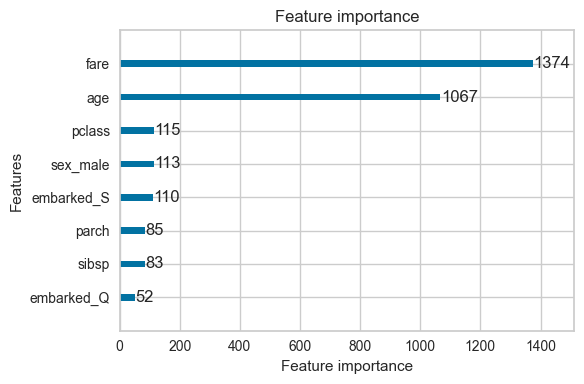

In [98]:
fig, ax = plt.subplots(figsize=(6,4))
lgb.plot_importance(lgbm_class, ax=ax)
fig.tight_layout()

<Axes: >

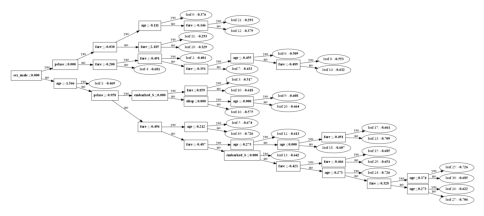

In [99]:
fig, ax = plt.subplots(figsize=(6,4))
lgb.plot_tree(lgbm_class, tree_index=0, ax=ax)

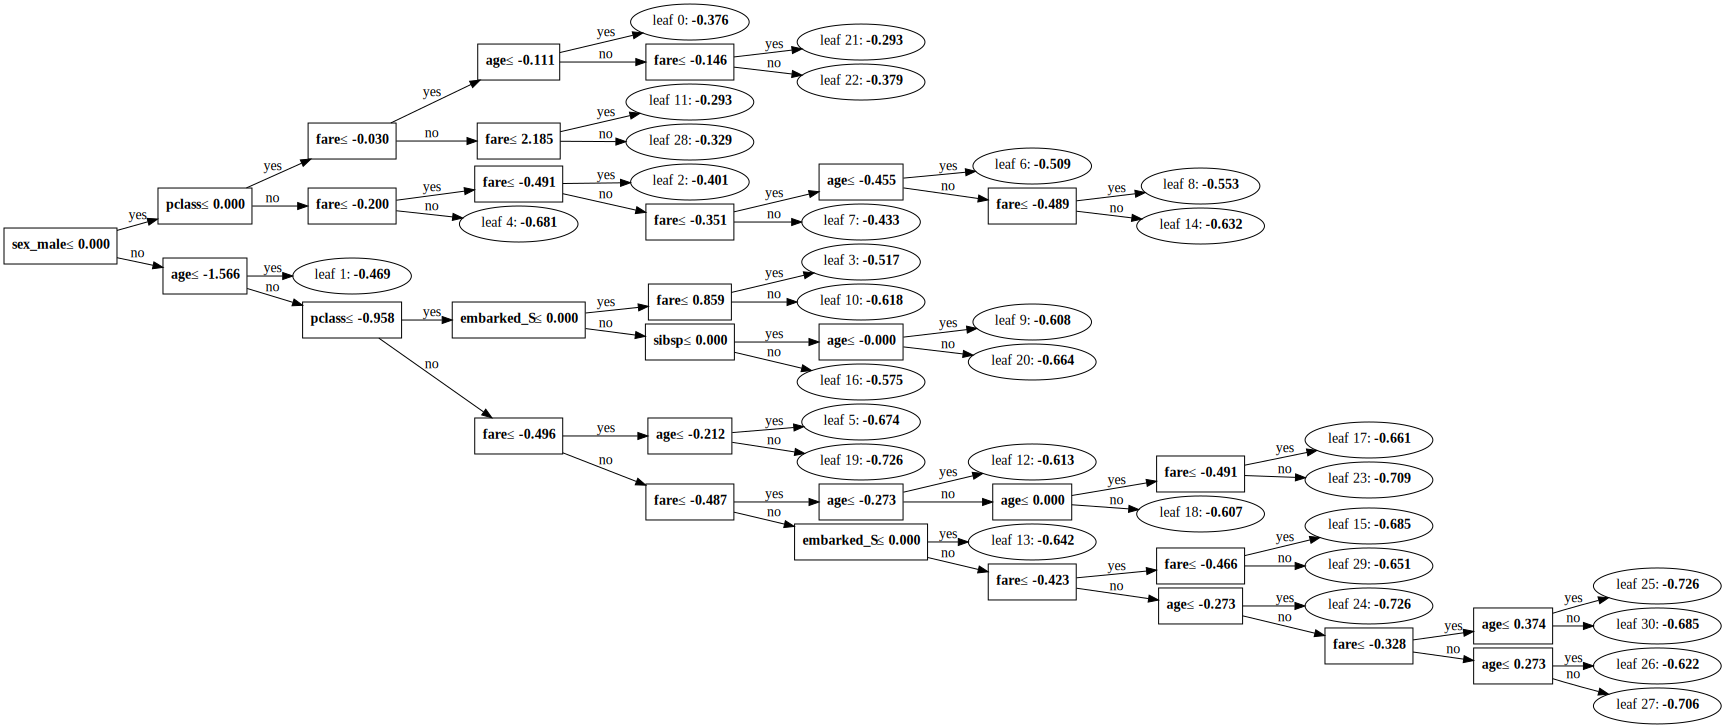

In [100]:
lgb.create_tree_digraph(lgbm_class)

 ### TPOT

In [87]:
#pip install tpot

In [88]:
from tpot import TPOTClassifier
tc = TPOTClassifier(generations=2)
tc.fit(X_train, y_train)
tc.score(X_test, y_test)


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier


C:\Users\timry\anaconda3\Lib\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
C:\Users\timry\anaconda3\Lib\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.


is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


0.8040712468193384

In [89]:
tc.score(X_test, y_test)

0.8040712468193384

In [90]:
tc.predict(X.iloc[[0]])

array([0], dtype=int64)

In [91]:
tc.predict_proba(X.iloc[[0]])

array([[0.53754323, 0.46245677]])

In [92]:
tc.export("tpot_exported_pipeline.py")